<a href="https://colab.research.google.com/github/MarwanAshraf22/ai-confluence/blob/main/projects/classical-machine-learning/House-Price-Prediction-Advanced-Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Advanced Regression Techniques

Data : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


## Uploading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create the .kaggle directory in the home directory if it doesn't already exist
!mkdir -p ~/.kaggle

# Copy the kaggle.json file (which contains your Kaggle API credentials) to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Download the dataset from the "House Prices: Advanced Regression Techniques" competition on Kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques


100% 199k/199k [00:00<00:00, 534kB/s]
100% 199k/199k [00:00<00:00, 533kB/s]


In [ ]:
import zipfile

# Open the zip file located at the specified path in read mode
zip_ref = zipfile.ZipFile('/content/house-prices-advanced-regression-techniques.zip', 'r')

# Extract all contents of the zip file into the specified directory
zip_ref.extractall('/content')

# Close the zip file to free up resources
zip_ref.close()


In [ ]:
# Read the training data from the CSV file into a pandas DataFrame
df = pd.read_csv('train.csv')

In [ ]:
# Print the shapes of 'train' and 'test' DataFrames
print(df.shape)

(1460, 81)


In [ ]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Processing

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

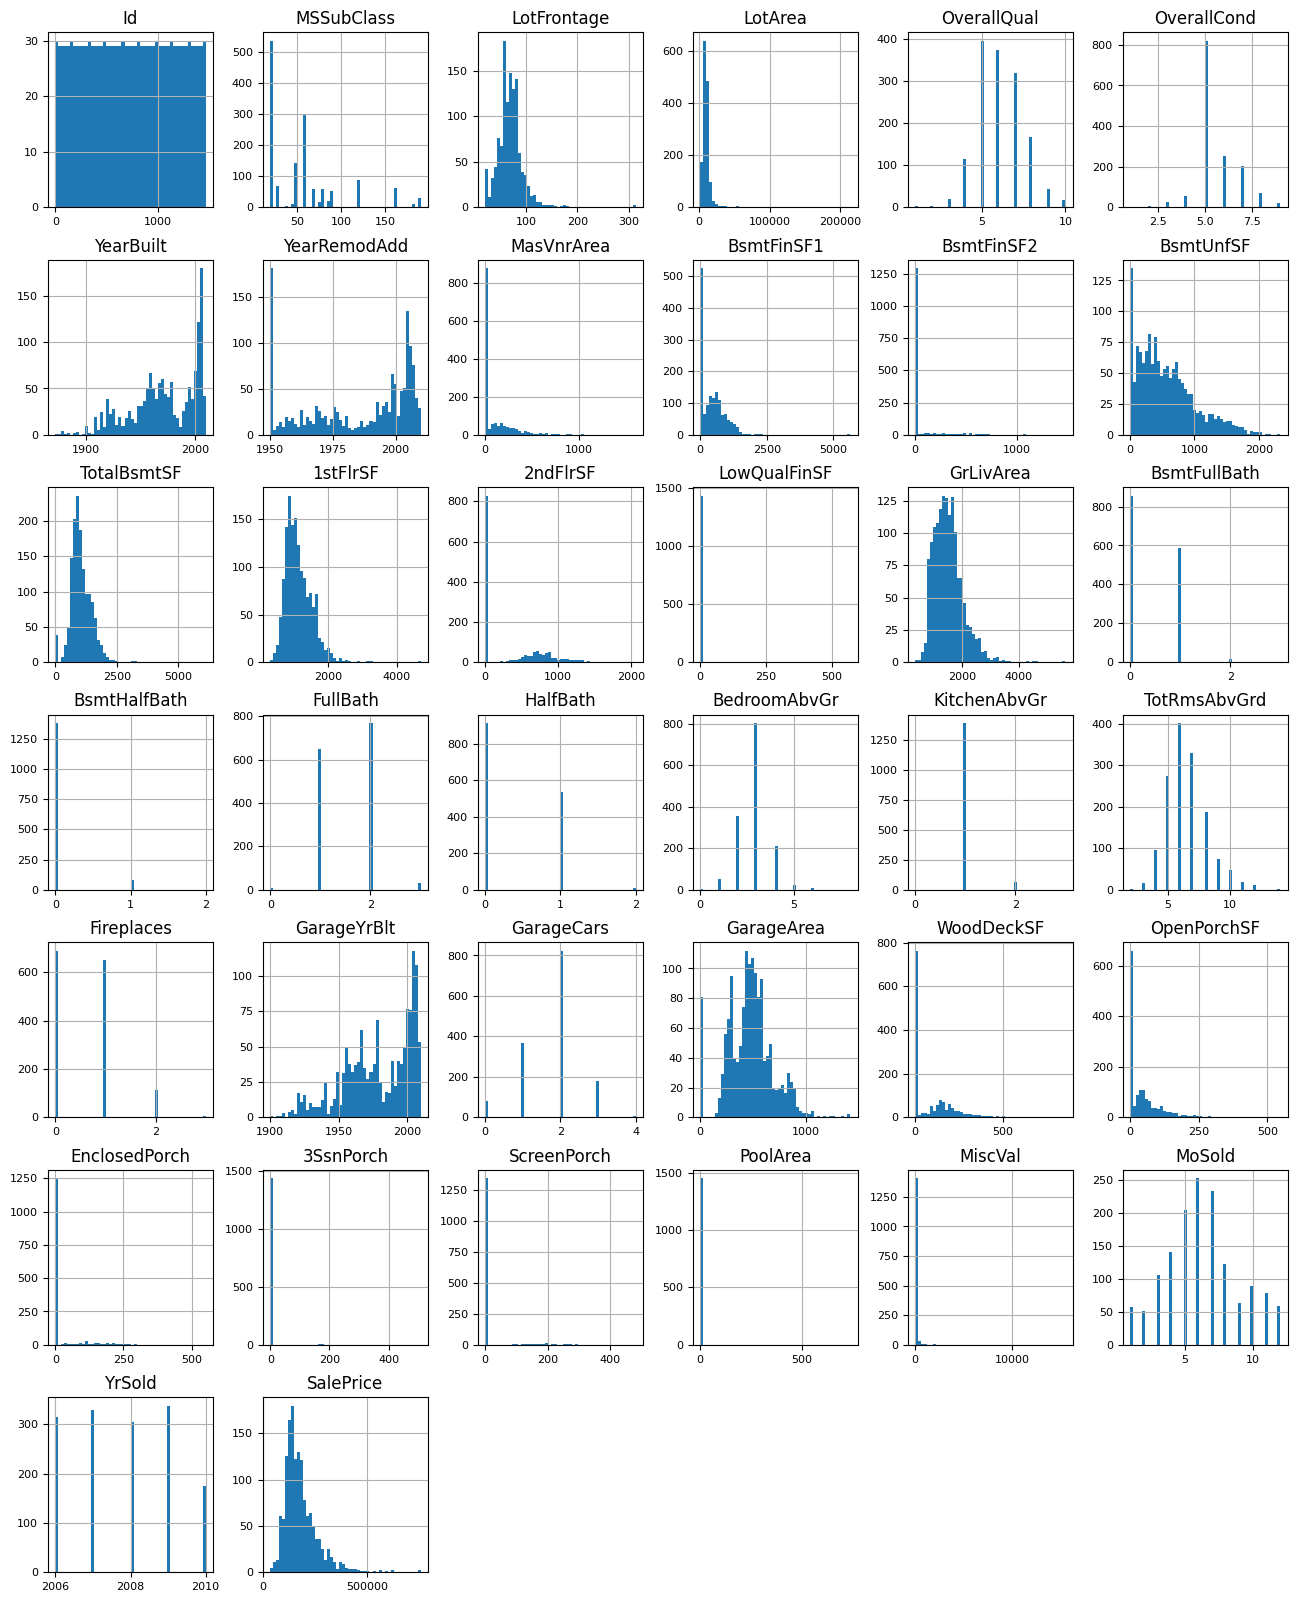

In [ ]:
# Select columns in DataFrame with data types 'float64' or 'int64'
df_num = df.select_dtypes(include=['float64', 'int64'])

# Generate histograms for each numerical column in 'df_num'
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Print the data types of each column in the DataFrame
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<Axes: >

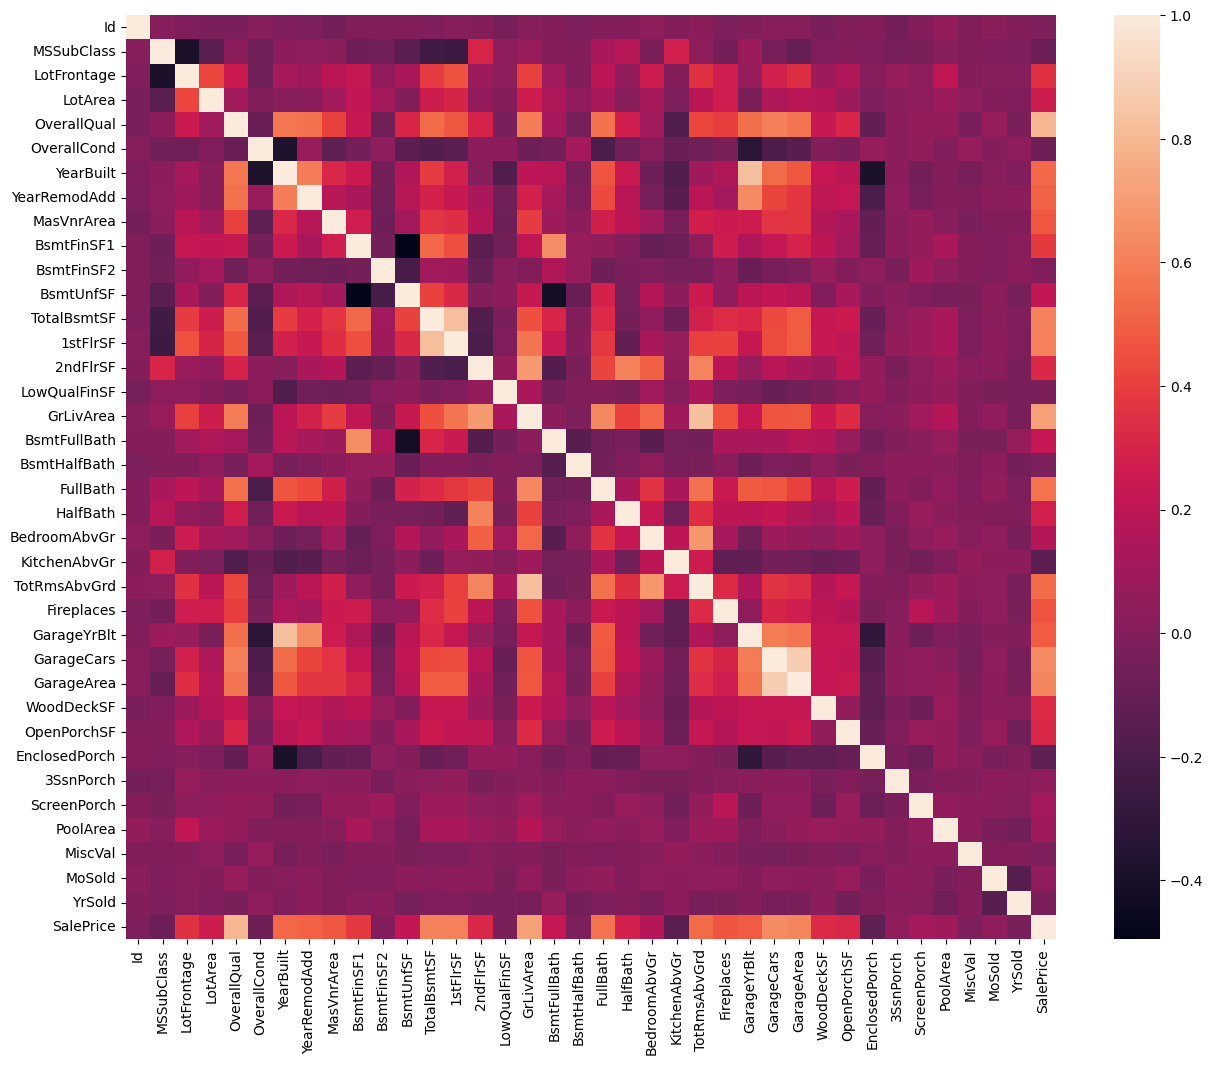

In [ ]:
# Select columns with numeric data types ('float64' and 'int64') from the DataFrame
numeric_train = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix between numeric columns in the 'numeric_train' DataFrame
corr = numeric_train.corr()

# Set the size of the heatmap figure
plt.subplots(figsize=(15, 12))

# Plot a heatmap of the correlation matrix using seaborn
sns.heatmap(corr)


Plotting how SalePrice (Target Variable) related to some of the features in the dataset


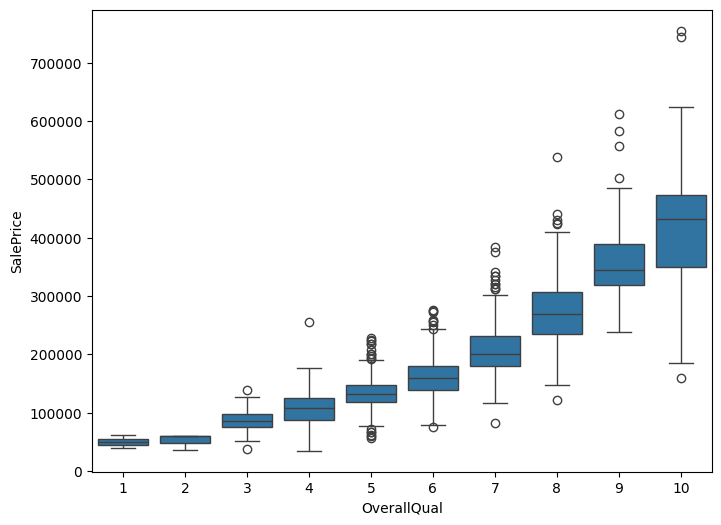

In [ ]:
# Concatenate 'SalePrice' and 'OverallQual' columns from the DataFrame
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)

# Set up the matplotlib figure and axis
f, ax = plt.subplots(figsize=(8, 6))

# Create a box plot showing the relationship between 'OverallQual' and 'SalePrice'
fig = sns.boxplot(x=df['OverallQual'], y="SalePrice", data=data)


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

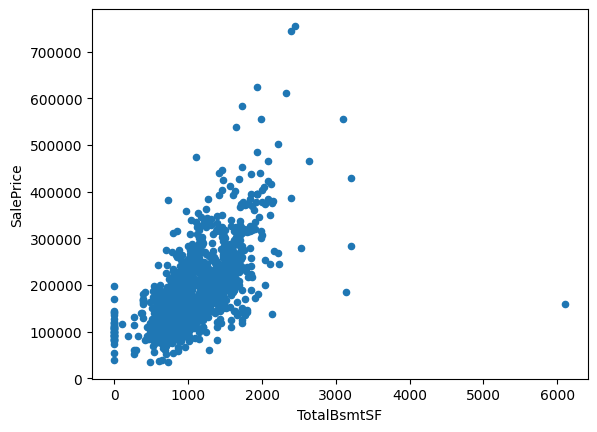

In [ ]:
# Concatenate 'SalePrice' and 'TotalBsmtSF' columns from the DataFrame
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)

# Create a scatter plot showing the relationship between 'TotalBsmtSF' and 'SalePrice'
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')


<Axes: xlabel='LotArea', ylabel='SalePrice'>

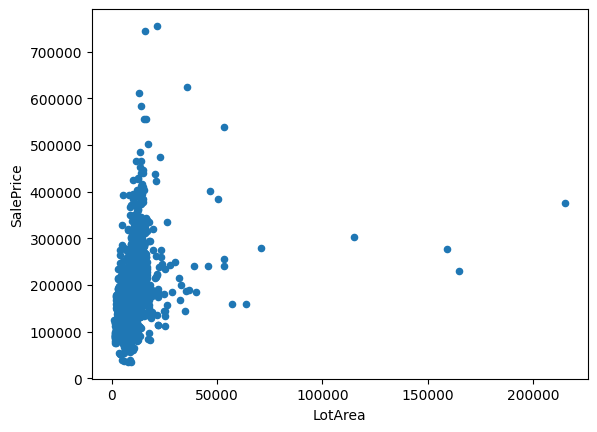

In [ ]:
data = pd.concat([df['SalePrice'], df['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

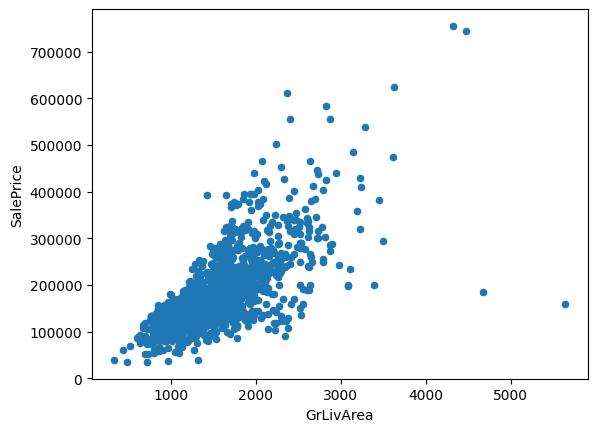

In [ ]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

## Feature Engineering and Modeling

<ipython-input-15-41c856d2d7cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


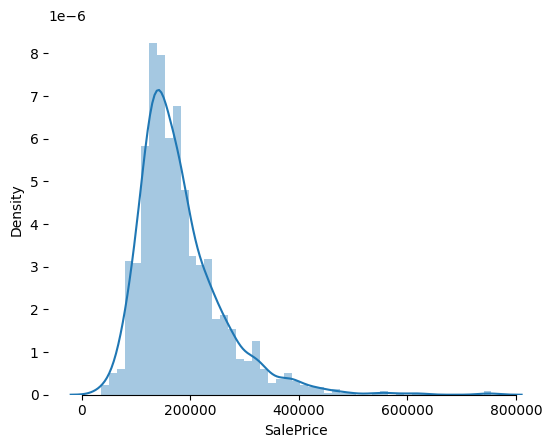

In [ ]:
# Plot the distribution of 'SalePrice' using seaborn
sns.distplot(df['SalePrice'])

# Remove gridlines along the x-axis
ax.xaxis.grid(False)

# Set the label for the y-axis
ax.set(ylabel="Frequency")

# Set the label for the x-axis
ax.set(xlabel="SalePrice")

# Set the title for the plot
ax.set(title="SalePrice distribution")

# Remove the top and right spines from the plot
sns.despine(trim=True, left=True)

# Display the plot
plt.show()


<ipython-input-16-7c23bb054de0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


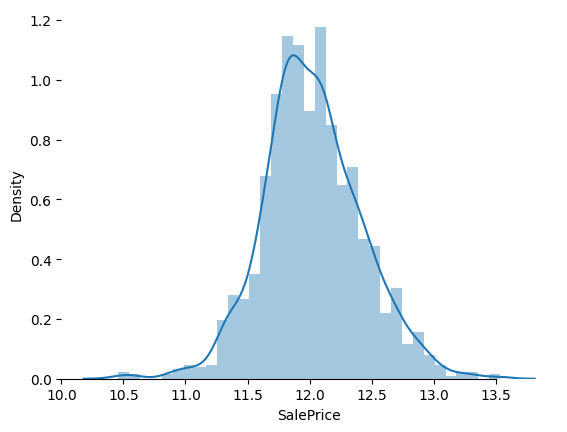

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])
y = df['SalePrice']
sns.distplot(df['SalePrice'])
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
# Count the number of missing values in each column of the DataFrame
df_null = df.isnull().sum()

# Keep only columns with missing values (count > 0)
df_null = df_null[df_null > 0]

# Sort the columns by the number of missing values in descending order
df_null = df_null.sort_values(ascending=False)


In [ ]:
# Select columns with data type 'object' (categorical features) from the DataFrame
cat_features = df.select_dtypes(include=['object']).columns

# Select columns with data types other than 'object' (numerical features) from the DataFrame
num_features = df.select_dtypes(exclude=["object"]).columns

# Remove the 'SalePrice' column from the list of numerical features
num_features = num_features.drop('SalePrice')

# Create a new DataFrame containing only the numerical features
df_num = df[num_features]

# Create a new DataFrame containing only the categorical features
df_cat = df[cat_features]

In [ ]:
# Fill missing values in the numerical features DataFrame ('train_num') with the median of each column
df_num = df_num.fillna(df_num.median())

# Check if there are any remaining missing values in the 'train_num' DataFrame
print(df_num.isna().sum().sum())

0


In [ ]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding) using pandas' get_dummies function
df_cat = pd.get_dummies(df_cat)

df_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.concat([df_cat,df_num],axis=1)
X.shape

(1460, 288)

In [ ]:
# Split the data into training and testing sets using train_test_split function
# X_train: Features for training set
# X_test: Features for testing set
# y_train: Target variable for training set
# y_test: Target variable for testing set
# test_size: Proportion of the dataset to include in the testing set (30%)
# random_state: Seed used by the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grids for each model
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_gbr = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

param_grid_enet = {
    'model__l1_ratio': [0.1, 0.5, 0.9],
    'model__alphas': [[0.1, 1.0, 10.0]]
}

# Initialize the models
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
enet = ElasticNetCV(cv=5, random_state=42)

# Create pipelines with a standard scaler
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb)
])

pipeline_gbr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', gbr)
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf)
])

pipeline_enet = Pipeline([
    ('scaler', StandardScaler()),
    ('model', enet)
])

# Initialize GridSearchCV for each model
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search_enet = GridSearchCV(pipeline_enet, param_grid_enet, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_enet.fit(X_train, y_train)

# Evaluate the models on the test set
best_xgb = grid_search_xgb.best_estimator_
best_gbr = grid_search_gbr.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_enet = grid_search_enet.best_estimator_

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_enet = best_enet.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
# Print test mean squared error and R² score for each model
print("XGBoost Test MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Test R²:", r2_score(y_test, y_pred_xgb))

print("Gradient Boosting Test MSE:", mean_squared_error(y_test, y_pred_gbr))
print("Gradient Boosting Test R²:", r2_score(y_test, y_pred_gbr))

print("Random Forest Test MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Test R²:", r2_score(y_test, y_pred_rf))

print("ElasticNetCV Test MSE:", mean_squared_error(y_test, y_pred_enet))
print("ElasticNetCV Test R²:", r2_score(y_test, y_pred_enet))

XGBoost Test MSE: 0.016150047587784613
XGBoost Test R²: 0.8954752357071729
Gradient Boosting Test MSE: 0.015936688884204755
Gradient Boosting Test R²: 0.8968561151182266
Random Forest Test MSE: 0.017721362276882643
Random Forest Test R²: 0.885305525889596
ElasticNetCV Test MSE: 0.0311588895548257
ElasticNetCV Test R²: 0.7983364712307235


### Based on the evaluation metrics, Gradient Boosting stands out as the optimal choice for this task, showcasing the most favorable performance in minimizing prediction errors on unseen data.